<a href="https://colab.research.google.com/github/yunyaopan/data_analytics_SG_tech_job_market/blob/main/SGtechJobMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#importing the necessary libraries
import requests
import json
import matplotlib.pyplot as plt

#initializing page number
page = 1

#initializing the list to store all the responses
jobs_list = []

#loop to iterate through all the pages
while True:
    #requesting the data from the API
    r = requests.get(f"https://nodeflair.com/api/v2/jobs?query=&page={page}&sort_by=relevant&countries%5B%5D=Singapore")
    #adding the response to the list
    jobs_list.append(r.json())
    print(page,end=', ')
    #terminating the loop if the job_listings is empty
    if len(r.json()["job_listings"]) == 0:
        break
    page += 1

#initializing a dictionary to store the number of jobs for each position
positions = {}

#iterating through the list to count the number of jobs for each position
for job in jobs_list:
    for job_listing in job["job_listings"]:
        position = job_listing["position"]
        if position in positions:
            positions[position] += 1
        else:
            positions[position] = 1

1, 2, 3, 

KeyboardInterrupt: ignored

In [34]:
# Sort the dictionary by value in decreasing order
sorted_positions_tuple = sorted(positions.items(), key=lambda x: x[1])
sorted_positions = dict(sorted_positions_tuple)

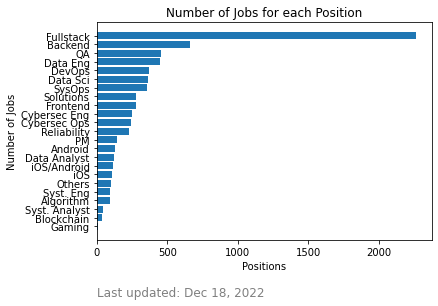

In [49]:
import datetime

#plotting the bar chart
plt.barh(list(sorted_positions.keys()), list(sorted_positions.values()))
plt.xlabel("Positions")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs for each Position")

# Add a side note with the current date
today = datetime.datetime.now().strftime('%b %d, %Y')
plt.text(0, -8, 'Last updated: ' + today, fontsize=12, color='gray')

plt.show()